**Problem 1**

In [107]:
import numpy as np   
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style

In [108]:
xls = pd.ExcelFile("/content/drive/My Drive/GL-DSBA-20-21/Machine Learning/Project/Election_Data.xlsx")

In [109]:
df = pd.read_excel(xls, 'Election_Dataset_Two Classes')

In [110]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [111]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  10


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [113]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['Unnamed: 0', 'age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [114]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [115]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [116]:
A=df['age'].unique()
A.sort()
A

array([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
       92, 93])

In [117]:
df['age']=pd.cut(df.age,bins=[20, 29, 39, 49, 59, 69, 79, 89, 93],labels=['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'])


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Unnamed: 0               1525 non-null   int64   
 1   vote                     1525 non-null   object  
 2   age                      1525 non-null   category
 3   economic.cond.national   1525 non-null   int64   
 4   economic.cond.household  1525 non-null   int64   
 5   Blair                    1525 non-null   int64   
 6   Hague                    1525 non-null   int64   
 7   Europe                   1525 non-null   int64   
 8   political.knowledge      1525 non-null   int64   
 9   gender                   1525 non-null   object  
dtypes: category(1), int64(7), object(2)
memory usage: 109.2+ KB


In [119]:
df["age"]= df["age"].astype(object) 

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   object
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(7), object(3)
memory usage: 119.3+ KB


In [121]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'age', 'gender']
['Unnamed: 0', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [122]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [123]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
age,1525,8,40s,307
gender,1525,2,female,812


In [124]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


AGE :  8
90s      5
20s     62
80s     73
70s    240
60s    263
30s    277
50s    298
40s    307
Name: age, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [125]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [126]:
print('rows     : ', df.shape[0])
print('columns  : ', df.shape[1])
print('\nFeatures : \n' , df.columns.tolist())
print('\nMissing values : ', df.isnull().any())
print('\nUnique values : \n', df.nunique())

rows     :  1525
columns  :  9

Features : 
 ['vote', 'age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']

Missing values :  vote                       False
age                        False
economic.cond.national     False
economic.cond.household    False
Blair                      False
Hague                      False
Europe                     False
political.knowledge        False
gender                     False
dtype: bool

Unique values : 
 vote                        2
age                         8
economic.cond.national      5
economic.cond.household     5
Blair                       5
Hague                       5
Europe                     11
political.knowledge         4
gender                      2
dtype: int64


In [127]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [128]:
df['age'] = pd.Categorical(df['age']).codes

In [129]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,2,3,3,4,1,2,2,female
1,Labour,1,4,4,4,4,5,2,male
2,Labour,1,4,4,5,2,3,2,male
3,Labour,0,4,2,2,1,4,0,female
4,Labour,2,2,2,1,1,6,2,male


In [130]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int8  
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(6), int8(1), object(2)
memory usage: 96.9+ KB


In [132]:
df =pd.get_dummies(df, columns=cat,drop_first=True)

In [133]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,2,3,3,4,1,2,2,1,0
1,1,4,4,4,4,5,2,1,1
2,1,4,4,5,2,3,2,1,1
3,0,4,2,2,1,4,0,1,0
4,2,2,2,1,1,6,2,1,1


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1525 non-null   int8 
 1   economic.cond.national   1525 non-null   int64
 2   economic.cond.household  1525 non-null   int64
 3   Blair                    1525 non-null   int64
 4   Hague                    1525 non-null   int64
 5   Europe                   1525 non-null   int64
 6   political.knowledge      1525 non-null   int64
 7   vote_Labour              1525 non-null   uint8
 8   gender_male              1525 non-null   uint8
dtypes: int64(6), int8(1), uint8(2)
memory usage: 76.1 KB


Text(0.5, 1.0, 'With Outliers')

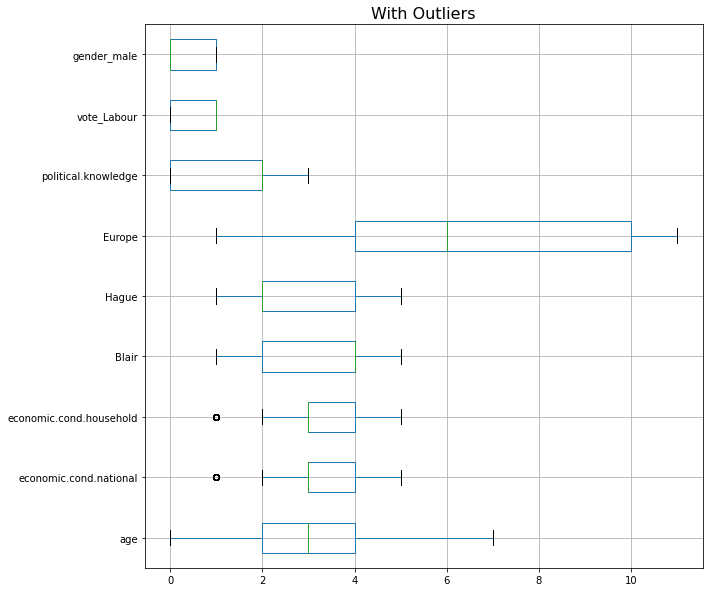

In [135]:
cont=df.dtypes[(df.dtypes!='float') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)

In [136]:
   def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [137]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

Text(0.5, 1.0, 'After Outlier Removal')

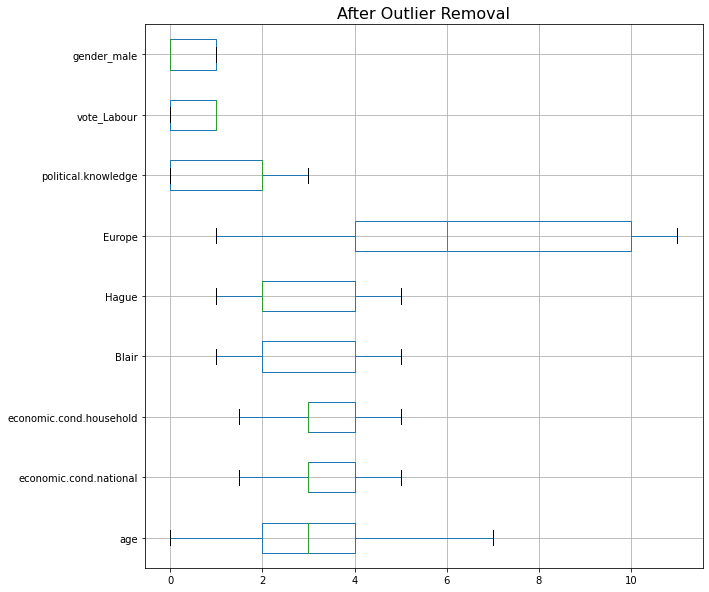

In [138]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)

In [139]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 73


In [140]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (1525, 9)
After (1452, 9)


In [141]:
df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
age,1.000000,0.033926,-0.038816,0.031448,0.024173,0.053425,-0.031306,-0.103945,-0.011993
economic.cond.national,0.033926,1.000000,0.343243,0.319181,-0.194491,-0.208465,-0.023317,0.297777,0.048693
economic.cond.household,-0.038816,0.343243,1.000000,0.218700,-0.095531,-0.119710,-0.038921,0.174988,0.037436
Blair,0.031448,0.319181,0.218700,1.000000,-0.231732,-0.289563,-0.012746,0.414506,0.065560
Hague,0.024173,-0.194491,-0.095531,-0.231732,1.000000,0.283699,-0.031607,-0.462228,-0.029567
Europe,0.053425,-0.208465,-0.119710,-0.289563,0.283699,1.000000,-0.141842,-0.381395,-0.065174
political.knowledge,-0.031306,-0.023317,-0.038921,-0.012746,-0.031607,-0.141842,1.000000,-0.107293,0.154352
vote_Labour,-0.103945,0.297777,0.174988,0.414506,-0.462228,-0.381395,-0.107293,1.000000,0.028386
gender_male,-0.011993,0.048693,0.037436,0.065560,-0.029567,-0.065174,0.154352,0.028386,1.000000


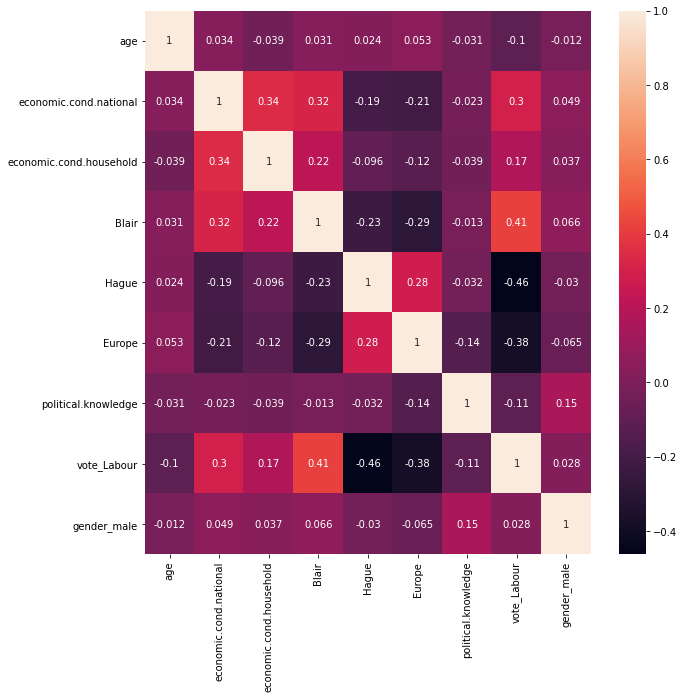

In [142]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

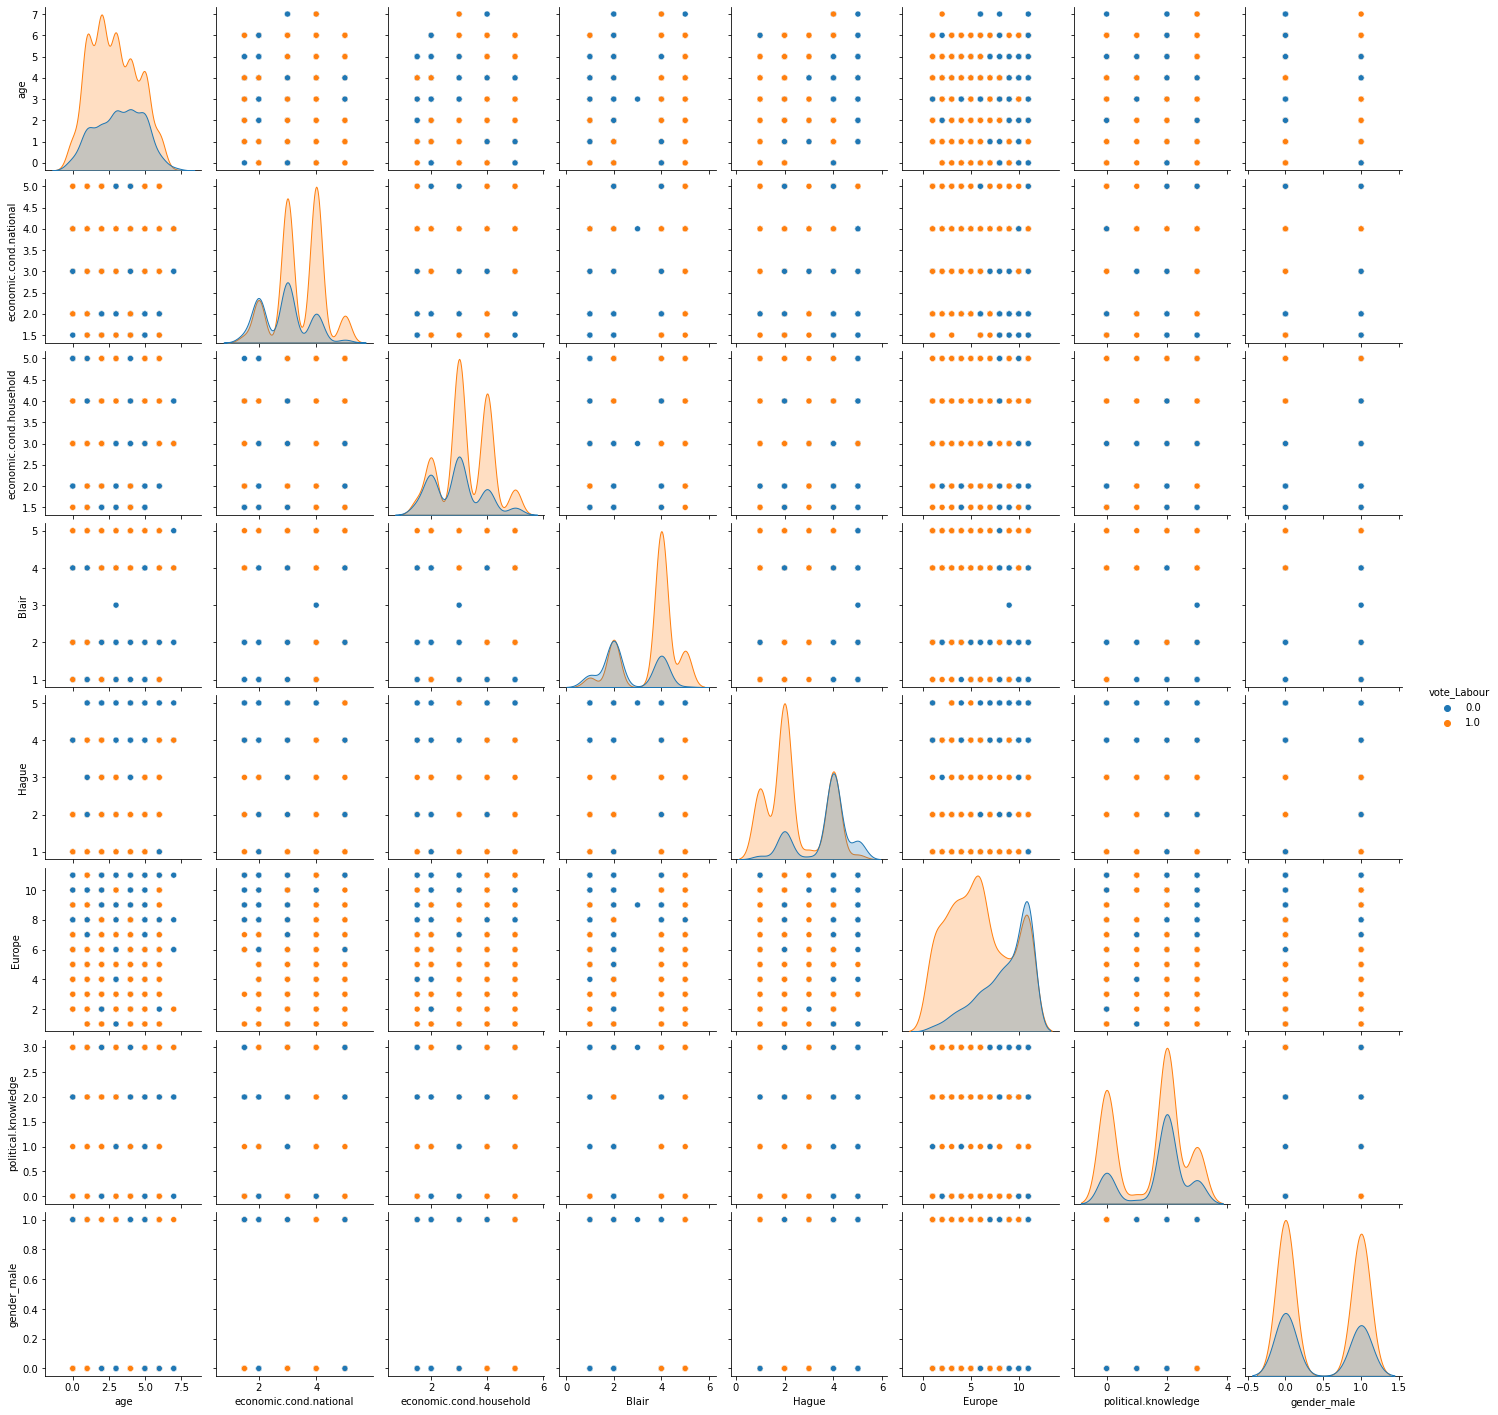

In [143]:
sns.pairplot(df,hue="vote_Labour")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


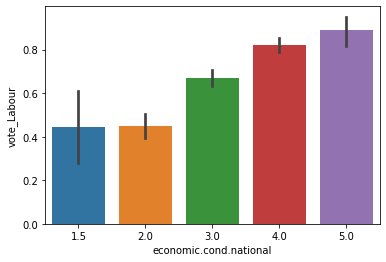

In [144]:
sns.barplot(df["economic.cond.national"], df['vote_Labour']) 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


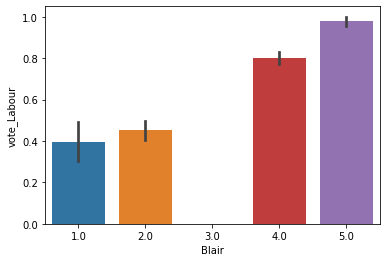

In [145]:
sns.barplot(df["Blair"], df['vote_Labour'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


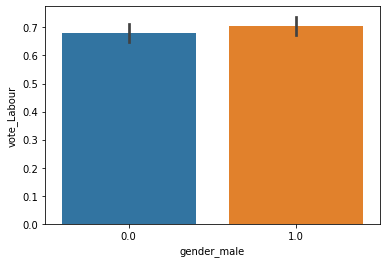

In [146]:
sns.barplot(df['gender_male'], df['vote_Labour'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


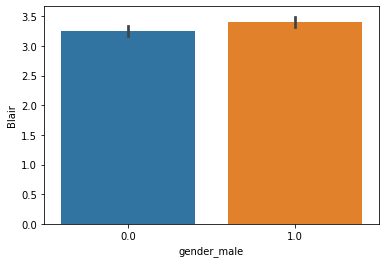

In [147]:
sns.barplot(df['gender_male'], df['Blair'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


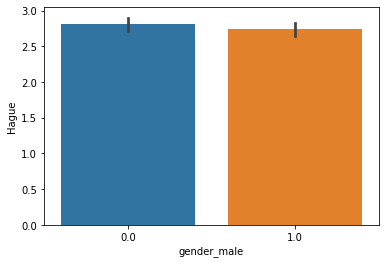

In [148]:
sns.barplot(df['gender_male'], df['Hague'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


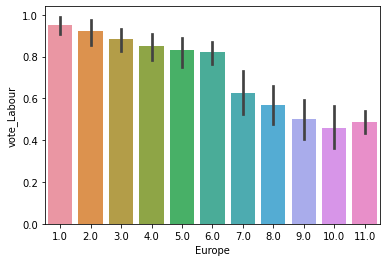

In [149]:
sns.barplot(df['Europe'], df['vote_Labour'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


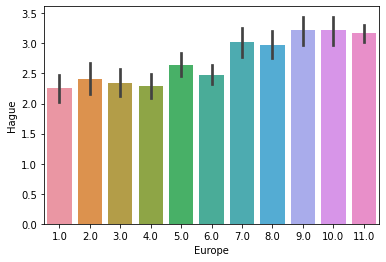

In [150]:
sns.barplot(df['Europe'], df['Hague'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


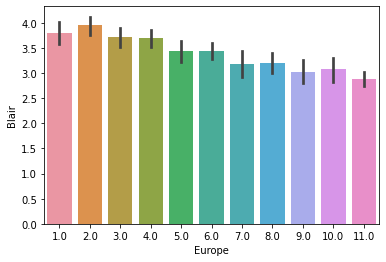

In [151]:
sns.barplot(df['Europe'], df['Blair'])

In [152]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.00000,1452.000000
mean,2.967631,3.251377,3.149793,3.323691,2.774105,6.732782,1.539945,0.69146,0.467631
std,1.614348,0.859634,0.895917,1.183934,1.243011,3.295709,1.085803,0.46205,0.499123
min,0.000000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000
25%,2.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.00000,0.000000
50%,3.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,1.00000,0.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,1.00000,1.000000
max,7.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000,1.00000,1.000000


In [153]:
df.skew(axis = 0, skipna = True) 

age                        0.118477
economic.cond.national    -0.052344
economic.cond.household    0.108795
Blair                     -0.514121
Hague                      0.102069
Europe                    -0.147985
political.knowledge       -0.418130
vote_Labour               -0.829885
gender_male                0.129883
dtype: float64

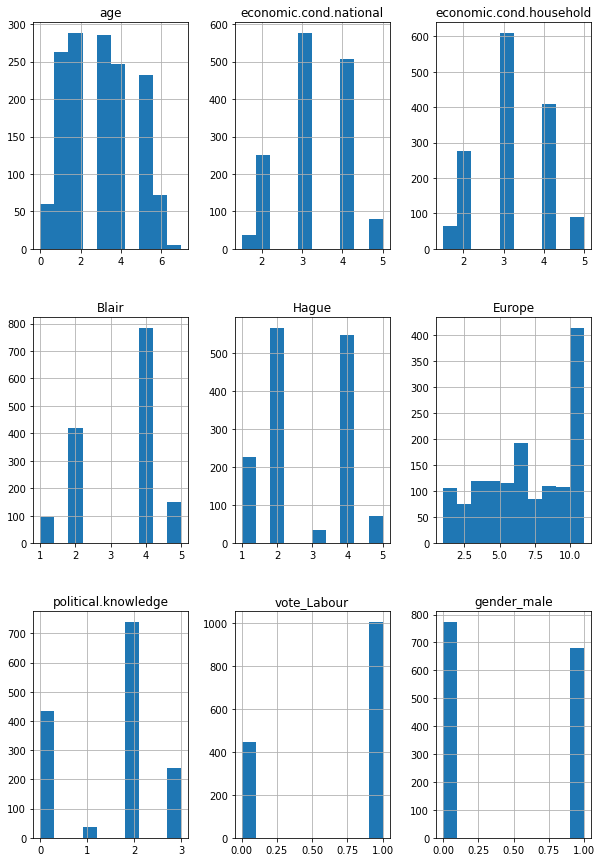

In [156]:
df.iloc[:,:].hist(figsize=(10,15))
plt.show()


In [157]:
df.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'vote_Labour', 'gender_male'],
      dtype='object')

In [158]:
X = df.drop('vote_Labour', axis=1)
y = df['vote_Labour']

In [233]:
X.head()


,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,2.0,3.0,3.0,4.0,1.0,2.0,2.0,0.0
1,1.0,4.0,4.0,4.0,4.0,5.0,2.0,1.0
2,1.0,4.0,4.0,5.0,2.0,3.0,2.0,1.0
3,0.0,4.0,2.0,2.0,1.0,4.0,0.0,0.0
4,2.0,2.0,2.0,1.0,1.0,6.0,2.0,1.0


In [234]:
X.shape

(1452, 8)

In [235]:
y.head()


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: vote_Labour, dtype: float64

In [236]:
y.shape

(1452,)

In [159]:
y.value_counts(normalize=True)

1.0    0.69146
0.0    0.30854
Name: vote_Labour, dtype: float64

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [177]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

0.8287401574803149
              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71       314
         1.0       0.86      0.89      0.88       702

    accuracy                           0.83      1016
   macro avg       0.80      0.79      0.80      1016
weighted avg       0.83      0.83      0.83      1016



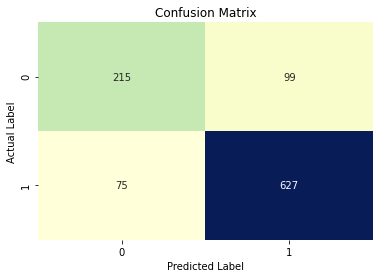

In [180]:
from sklearn import metrics
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train, y_train_predict))

0.8279816513761468
              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71       134
         1.0       0.87      0.89      0.88       302

    accuracy                           0.83       436
   macro avg       0.80      0.79      0.79       436
weighted avg       0.83      0.83      0.83       436



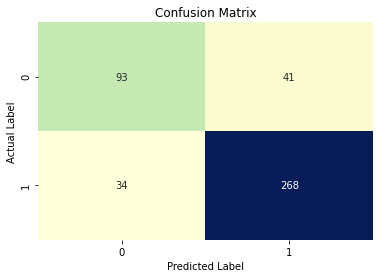

In [181]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.891


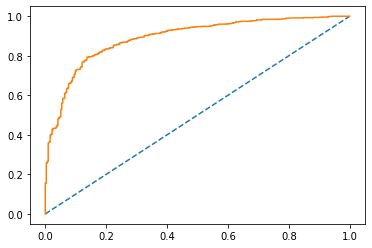

In [182]:
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)


AUC: 0.866


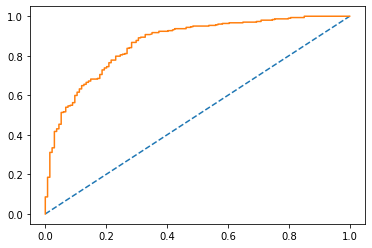

In [183]:
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [186]:
LR_model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [187]:
from sklearn.model_selection import train_test_split,GridSearchCV
grid_search = GridSearchCV(estimator = LR_model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')

In [188]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [189]:
LR_best_model = grid_search.best_estimator_

In [190]:
ytrain_predict = LR_best_model.predict(X_train)
ytest_predict = LR_best_model.predict(X_test)

In [191]:
ytest_predict_prob=LR_best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.897084,0.102916
1,0.695766,0.304234
2,0.137921,0.862079
3,0.034781,0.965219
4,0.154551,0.845449


0.8297244094488189
              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71       314
         1.0       0.86      0.90      0.88       702

    accuracy                           0.83      1016
   macro avg       0.81      0.79      0.79      1016
weighted avg       0.83      0.83      0.83      1016



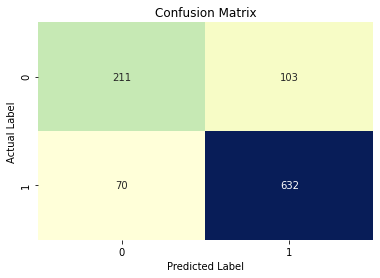

In [192]:
LR_model_score = LR_best_model.score(X_train, y_train)
print(LR_model_score)
sns.heatmap(metrics.confusion_matrix(y_train, ytrain_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train, ytrain_predict))


0.8256880733944955
              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71       134
         1.0       0.86      0.89      0.88       302

    accuracy                           0.83       436
   macro avg       0.80      0.79      0.79       436
weighted avg       0.82      0.83      0.82       436



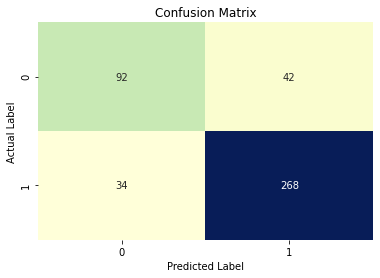

In [193]:
LR_model_score = LR_best_model.score(X_test, y_test)
print(LR_model_score)
sns.heatmap(metrics.confusion_matrix(y_test, ytest_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test, ytest_predict))

AUC: 0.891


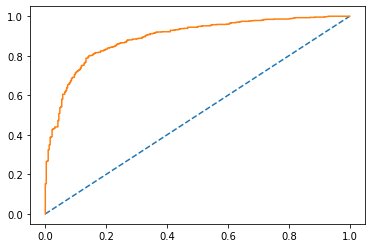

In [194]:
probs = LR_best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logit_train_auc)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr)

AUC: 0.863


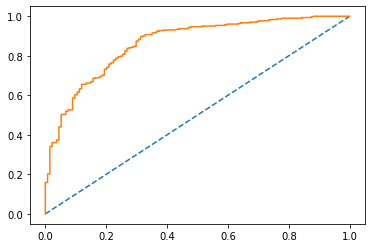

In [195]:
# plot the roc curve for the model
probs = LR_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logit_test_auc)
# calculate roc curve
logit_test_fpr, logit_test_tpr, logit_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_test_fpr, logit_test_tpr)

In [196]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

0.8612204724409449
              precision    recall  f1-score   support

         0.0       0.82      0.71      0.76       314
         1.0       0.88      0.93      0.90       702

    accuracy                           0.86      1016
   macro avg       0.85      0.82      0.83      1016
weighted avg       0.86      0.86      0.86      1016



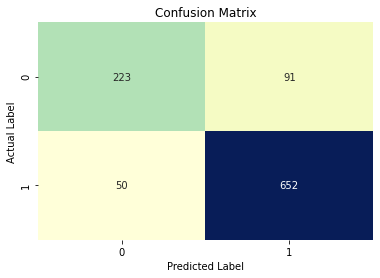

In [197]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train, y_train_predict))

0.823394495412844
              precision    recall  f1-score   support

         0.0       0.74      0.66      0.70       134
         1.0       0.86      0.89      0.88       302

    accuracy                           0.82       436
   macro avg       0.80      0.78      0.79       436
weighted avg       0.82      0.82      0.82       436



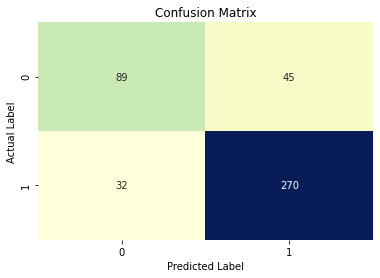

In [198]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.923


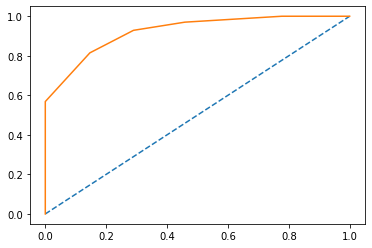

In [199]:
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr)

AUC: 0.870


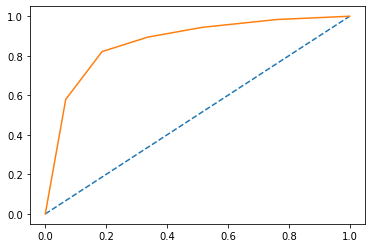

In [200]:
# plot the roc curve for the model
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr)

In [201]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

0.8307086614173228
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.72       314
         1.0       0.87      0.88      0.88       702

    accuracy                           0.83      1016
   macro avg       0.80      0.80      0.80      1016
weighted avg       0.83      0.83      0.83      1016



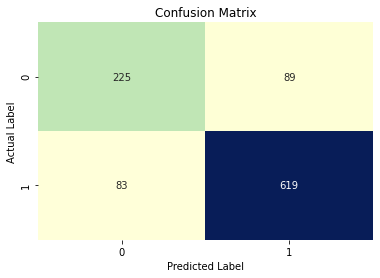

In [202]:
y_train_predict = NB_model.predict(X_train)
NB_model_score = NB_model.score(X_train, y_train)
print(NB_model_score)
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train, y_train_predict))

0.8142201834862385
              precision    recall  f1-score   support

         0.0       0.70      0.69      0.69       134
         1.0       0.86      0.87      0.87       302

    accuracy                           0.81       436
   macro avg       0.78      0.78      0.78       436
weighted avg       0.81      0.81      0.81       436



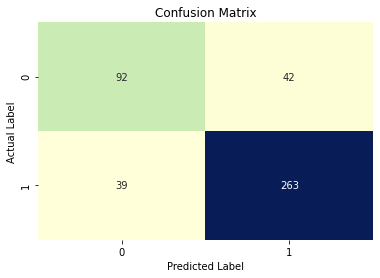

In [203]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.888


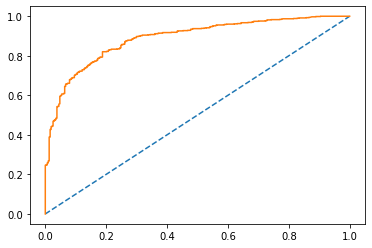

In [204]:
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr)

AUC: 0.859


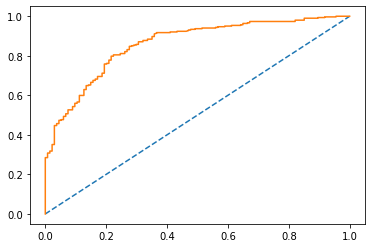

In [205]:
# plot the roc curve for the model
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr)

In [206]:

from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth': [30, 50,100], 
    'max_features': [2, 3, 7], 
    'min_samples_leaf': [2, 5, 7],
    'min_samples_split': [10, 15, 30],
    'n_estimators': [100, 300, 500]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [207]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [208]:
grid_search.best_params_

{'max_depth': 50,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [209]:
RF_best_grid = grid_search.best_estimator_
RF_best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [210]:
ytrain_predict = RF_best_grid.predict(X_train)
ytest_predict = RF_best_grid.predict(X_test)

0.8927165354330708
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82       314
         1.0       0.91      0.94      0.92       702

    accuracy                           0.89      1016
   macro avg       0.88      0.86      0.87      1016
weighted avg       0.89      0.89      0.89      1016



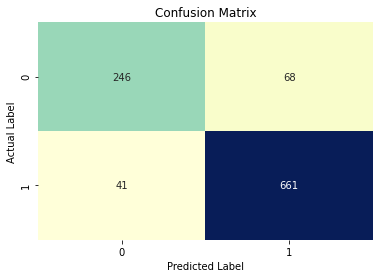

In [211]:
ytrain_predict = RF_best_grid.predict(X_train)
RF_model_score =RF_best_grid.score(X_train, y_train)
print(RF_model_score)
sns.heatmap(confusion_matrix(y_train,ytrain_predict), annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train, ytrain_predict)) 

0.8211009174311926
              precision    recall  f1-score   support

         0.0       0.73      0.67      0.70       134
         1.0       0.86      0.89      0.87       302

    accuracy                           0.82       436
   macro avg       0.79      0.78      0.79       436
weighted avg       0.82      0.82      0.82       436



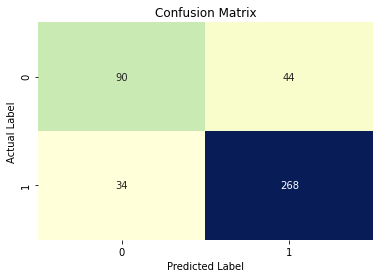

In [212]:
ytest_predict = RF_best_grid.predict(X_test)
RF_model_score = RF_best_grid.score(X_test, y_test)
print(RF_model_score)
sns.heatmap(metrics.confusion_matrix(y_test, ytest_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test, ytest_predict))

AUC: 0.962


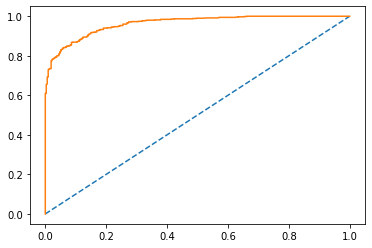

In [213]:
probs = RF_best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr)

AUC: 0.884


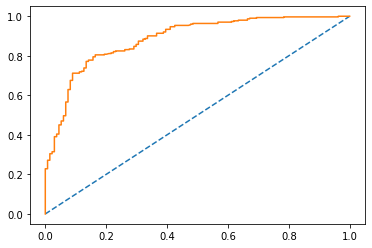

In [214]:
# plot the roc curve for the model
probs = RF_best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr)

In [215]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


0.9921259842519685
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       314
         1.0       1.00      0.99      0.99       702

    accuracy                           0.99      1016
   macro avg       0.99      0.99      0.99      1016
weighted avg       0.99      0.99      0.99      1016



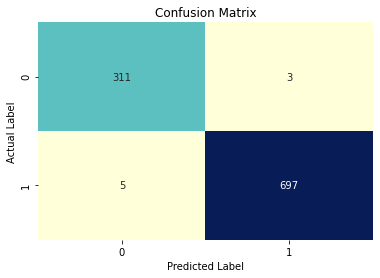

In [216]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train, y_train_predict))

0.805045871559633
              precision    recall  f1-score   support

         0.0       0.67      0.71      0.69       134
         1.0       0.87      0.85      0.86       302

    accuracy                           0.81       436
   macro avg       0.77      0.78      0.77       436
weighted avg       0.81      0.81      0.81       436



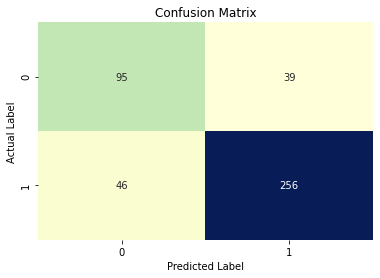

In [217]:
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 1.000


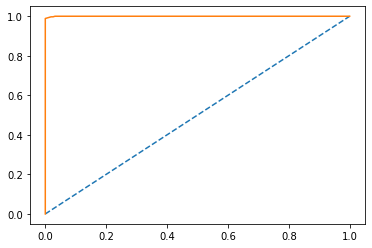

In [218]:
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bg_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % bg_train_auc)
# calculate roc curve
bg_train_fpr, bg_train_tpr, bg_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bg_train_fpr, bg_train_tpr)

AUC: 0.870


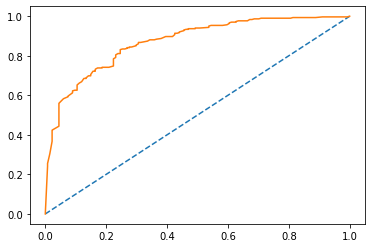

In [219]:
# plot the roc curve for the model
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bg_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bg_test_auc)
# calculate roc curve
bg_test_fpr, bg_test_tpr, bg_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bg_test_fpr, bg_test_tpr)

In [220]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=200,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=1)

0.8248031496062992
              precision    recall  f1-score   support

         0.0       0.74      0.66      0.70       314
         1.0       0.86      0.90      0.88       702

    accuracy                           0.82      1016
   macro avg       0.80      0.78      0.79      1016
weighted avg       0.82      0.82      0.82      1016



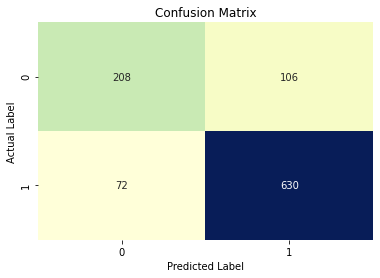

In [221]:
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train, y_train_predict))

0.823394495412844
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71       134
         1.0       0.87      0.87      0.87       302

    accuracy                           0.82       436
   macro avg       0.79      0.79      0.79       436
weighted avg       0.82      0.82      0.82       436



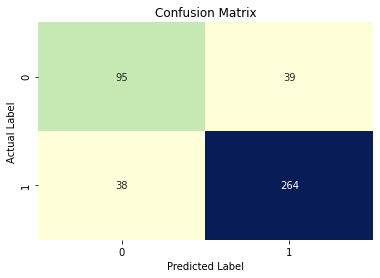

In [222]:
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.905


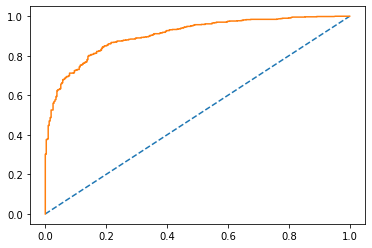

In [223]:
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ad_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ad_train_auc)
# calculate roc curve
ad_train_fpr, ad_train_tpr, ad_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ad_train_fpr, ad_train_tpr)

AUC: 0.870


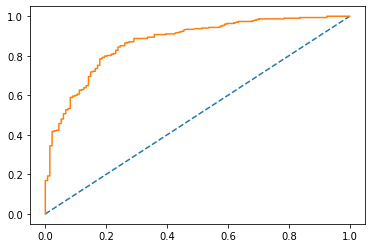

In [224]:
# plot the roc curve for the model
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ad_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ad_test_auc)
# calculate roc curve
ad_test_fpr, ad_test_tpr, ad_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ad_test_fpr, ad_test_tpr)

In [225]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8848425196850394
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       314
         1.0       0.91      0.93      0.92       702

    accuracy                           0.88      1016
   macro avg       0.87      0.86      0.86      1016
weighted avg       0.88      0.88      0.88      1016



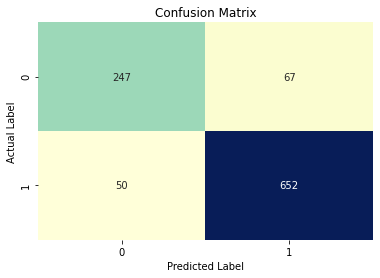

In [226]:
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_train, y_train_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_train, y_train_predict))

0.8188073394495413
              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70       134
         1.0       0.87      0.87      0.87       302

    accuracy                           0.82       436
   macro avg       0.79      0.78      0.79       436
weighted avg       0.82      0.82      0.82       436



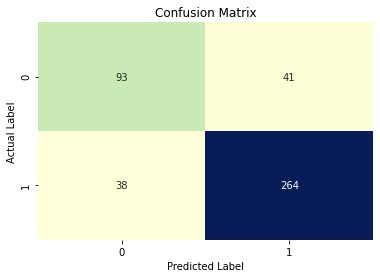

In [227]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
sns.heatmap(metrics.confusion_matrix(y_test, y_test_predict), annot=True,fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.943


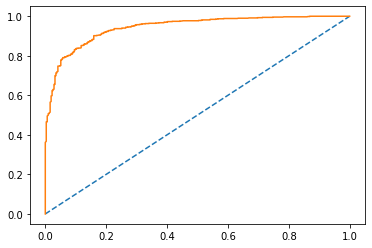

In [228]:
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % gb_train_auc)
# calculate roc curve
gb_train_fpr, gb_train_tpr, gb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gb_train_fpr, gb_train_tpr)

AUC: 0.890


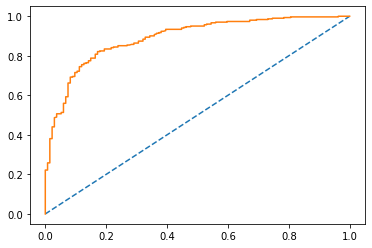

In [229]:
# plot the roc curve for the model
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % gb_test_auc)
# calculate roc curve
gb_test_fpr, gb_test_tpr, gb_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gb_test_fpr, gb_test_tpr)

In [238]:
print (pd.DataFrame(RF_best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
Hague                    0.279653
Europe                   0.219852
Blair                    0.157615
economic.cond.national   0.099712
political.knowledge      0.093401
age                      0.073255
economic.cond.household  0.058560
gender_male              0.017954


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


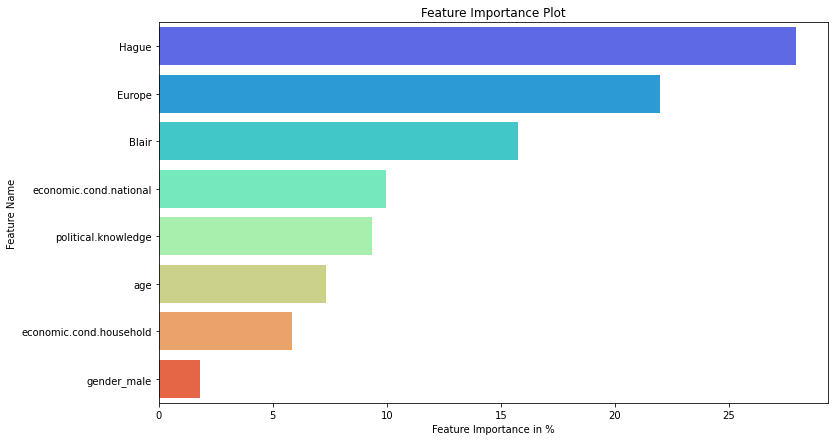

In [240]:
x=pd.DataFrame(RF_best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


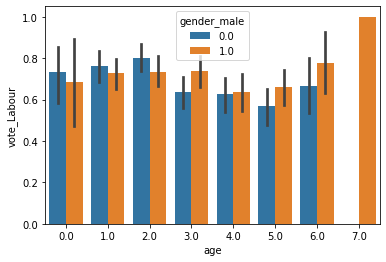

In [250]:
sns.barplot(df['age'], df['vote_Labour'], hue =df['gender_male'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


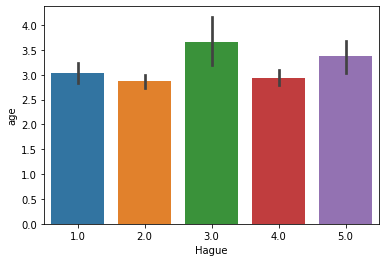

In [246]:
sns.barplot df['age'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


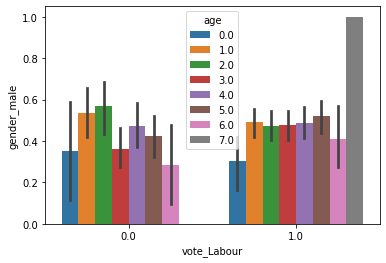

In [251]:
sns.barplot( df['vote_Labour'], df['gender_male'], hue = df['age'])

**Probelm 2**

In [77]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [78]:
dg = pd.DataFrame({'Speech' : [inaugural.raw('1941-Roosevelt.txt'), inaugural.raw('1961-Kennedy.txt'), inaugural.raw('1973-Nixon.txt')]})

In [79]:
dg.head()

,Speech
0,On each national day of inauguration since 178...
1,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [80]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Speech  3 non-null      object
dtypes: object(1)
memory usage: 152.0+ bytes


In [81]:
dg.shape

(3, 1)

In [82]:
dg['word_count'] = dg['Speech'].apply(lambda x: len(str(x).split(" ")))
dg[['Speech','word_count']].head()

,Speech,word_count
0,On each national day of inauguration since 178...,1323
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


In [83]:
dg['char_count'] = dg['Speech'].str.len() 
dg[['Speech','char_count']].head()

,Speech,char_count
0,On each national day of inauguration since 178...,7571
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


In [84]:
import re
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

dg['sentence_count'] = dg['Speech'].apply(lambda x: len(str(x).split(".")))
dg[['Speech','sentence_count']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Speech,sentence_count
0,On each national day of inauguration since 178...,69
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",56
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",70


In [85]:
dg['totalwords'] = [len(x.split()) for x in dg['Speech'].tolist()]
dg[['Speech','totalwords']].head()

,Speech,totalwords
0,On each national day of inauguration since 178...,1360
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819


In [86]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

dg['avg_word'] = dg['Speech'].apply(lambda x: avg_word(x))
dg[['Speech','avg_word']].head()

,Speech,avg_word
0,On each national day of inauguration since 178...,4.539706
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",4.461871
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",4.465091


In [87]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
dg['stopwords'] = dg['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
dg[['Speech','stopwords']].head()

,Speech,stopwords
0,On each national day of inauguration since 178...,632
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",899


In [89]:
dg['Speech'] = dg['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dg['Speech'].head()

0    on each national day of inauguration since 178...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

In [90]:
dg['Speech'] = dg['Speech'].str.replace('[^\w\s]','')
dg['Speech'].head()

0    on each national day of inauguration since 178...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [91]:
dg['Speech'] = dg['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dg['Speech'].head()

0    national day inauguration since 1789 people re...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [92]:
freq = pd.Series(' '.join(dg['Speech']).split()).value_counts()[:3]
freq

us       46
let      39
world    27
dtype: int64

In [93]:
freq =['us','let']


In [99]:
dg['Speech'] = dg['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dg['Speech'].head()

0    national day inauguration since 1789 people re...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [100]:
l_freq = pd.Series(' '.join(dg['Speech']).split()).value_counts()[-3:]
l_freq

spiritual         1
middle            1
transportation    1
dtype: int64

In [102]:
u_freq = pd.Series(' '.join(dg['Speech']).split()).value_counts()[:3]
u_freq

world    27
new      26
peace    23
dtype: int64

In [103]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
dg['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    nation day inaugur sinc 1789 peopl renew sens ...
1    vice presid johnson mr speaker mr chief justic...
2    mr vice presid mr speaker mr chief justic sena...
Name: Speech, dtype: object

In [104]:
corpus = dg['Speech']

In [105]:
wc_a = ' '.join(corpus)

Word Cloud for Speech (after cleaning)!!


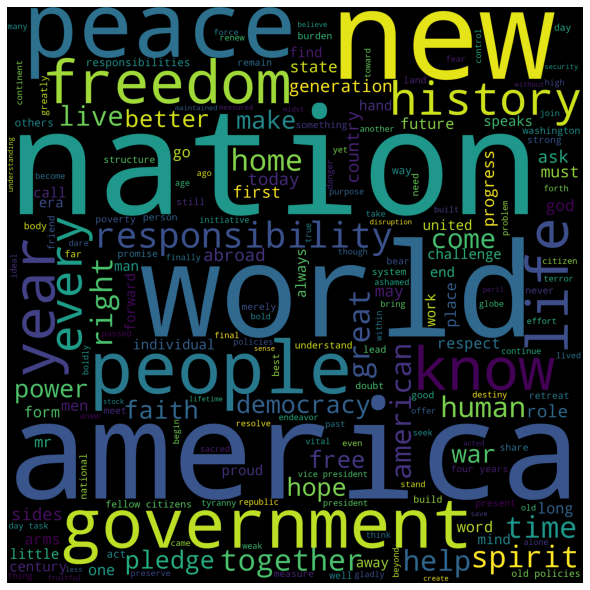

In [106]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Speech (after cleaning)!!")
plt.show()